Assignment 02\
190639B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import linalg

In [20]:
N=100
half_n=N//2
r=10
s=r/16
t=np.random.uniform(0,2*np.pi,half_n)
n=s*np.random.randn(half_n)
x,y=(r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b=-1,2
x=np.linspace(-12,12,half_n )
y=m*x+b+s*np.random.randn(half_n )
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X= np.vstack((X_circ,X_line))

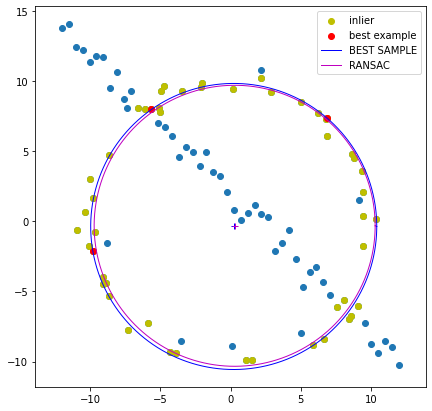

In [23]:
def random_points(X,n):
    sample=[]
    ran=[]
    for r in range(0,n):
        random_index=np.random.randint(len(X))
        while True:
            if random_index not in ran:
                ran.append(random_index)
                break
            else:
                random_index=np.random.randint(len(X))
        sample.append(X[random_index])
    return sample
def model_circle(X):
    sample=random_points(X,3)
    p1,p2,p3=sample[0],sample[1],sample[2]
    A=np.array([[2*p1[0]-2*p2[0],2*p1[1]-2*p2[1]],[2*p2[0]-2*p3[0],2*p2[1]-2*p3[1]]])
    B=np.array([[p1[0]**2-p2[0]**2+p1[1]**2-p2[1]**2],[p2[0]**2-p3[0]**2+p2[1]**2-p3[1]**2]])
    center=np.matmul(linalg.inv(A),B)
    radius=np.sqrt((p1[0]-center[0][0])**2+(p1[1]-center[1][0])**2)
    return center,radius,sample
def check_neighbour(x,y,a,b,r):
    return (x-a)**2+(y-b)**2-r**2
def BEST_model(X,probability,n):
    while True:
        new_X=[]
        threshold_value=1
        center,radius,sample=model_circle(X)
        a,b=center[0][0],center[1][0]
        for i in X:
            if check_neighbour(i[0],i[1],a,b,radius+threshold_value)<=0:
                if check_neighbour(i[0],i[1],a,b,radius-threshold_value)>=0:
                    new_X.append(i)
        if (len(new_X)/len(X))>=probability and -10<a<10 and -15<b<15:
            return a,b,radius,np.array(new_X),np.array(sample)
a,b,r,new_X,sample=BEST_model(X,0.5,3)
c,d,r1,new_x1,sample1=BEST_model(new_X,0.9,3)
t=np.linspace(0,2*np.pi,1000)
y,x=b+r*np.sin(t),a+r*np.cos(t)
y1,x1=d+r1*np.sin(t),c+r1*np.cos(t)
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(X[:,0],X[:,1])
ax.scatter(new_X[:,0],new_X[:,1],c='y',label='inlier')
ax.scatter(sample[:,0],sample[:,1],c='r',label='best example')
ax.plot(x,y,c='b',label='BEST SAMPLE',linewidth=1)
ax.plot(a,b,'b+')
ax.plot(x1,y1,c='m',label='RANSAC',linewidth=1)
ax.plot(c,d,'m+')
ax.legend(fancybox=True)
ax.axis('equal')
plt.show()

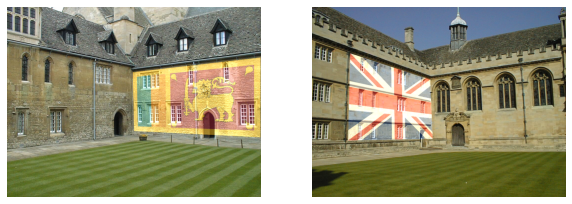

In [29]:
point_matrix = np.zeros((4,2)) 
counter = 0
def mousePoints(event,x,y,flags,params):
    global counter
    if event == cv.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1

img1=cv.imread(r'002.jpg')
img2=cv.imread(r'Flag_of_Sri_Lanka.svg.png')
shape=np.shape(img2)
H,W=shape[0],shape[1]
source_points=np.array([[0,0],[W-1,0],[W-1,H-1],[0,H-1]])

while True:
    if counter==4:
        cv.destroyAllWindows()
        break
    cv.imshow("Original Image ", img1)
    cv.setMouseCallback("Original Image ", mousePoints)
    cv.waitKey(0)
h,status=cv.findHomography(source_points,point_matrix)
im_out = cv.warpPerspective(img2, h, (img1.shape[1],img1.shape[0]))
dst1 = cv.addWeighted(img1,1,im_out,0.5,0)

img1=cv.imread(r'004.jpg')
img2=cv.imread(r'UK.png')
shape=np.shape(img2)
counter=0
H,W=shape[0],shape[1]
source_points=np.array([[0,0],[W-1,0],[W-1,H-1],[0,H-1]])
while True:
    if counter==4:
        cv.destroyAllWindows()
        break
    cv.imshow("Original Image ", img1)
    cv.setMouseCallback("Original Image ", mousePoints)
    cv.waitKey(0)
h,status=cv.findHomography(source_points,point_matrix)
im_out = cv.warpPerspective(img2, h, (img1.shape[1],img1.shape[0]))
dst2 = cv.addWeighted(img1,1,im_out,0.5,0)
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(cv.cvtColor(dst1,cv.COLOR_BGR2RGB))
axes[0].axis('off')
axes[1].imshow(cv.cvtColor(dst2,cv.COLOR_BGR2RGB))
axes[1].axis('off')
plt.show()

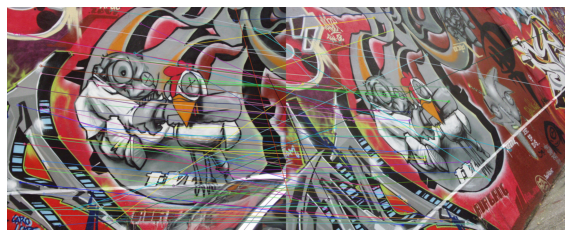

In [24]:
img1 = cv.imread(r'D:\4th sem uom\machine vision\Assignment\Assignment 2\graftar\img1.ppm',cv.IMREAD_COLOR)
img2 = cv.imread(r'D:\4th sem uom\machine vision\Assignment\Assignment 2\graftar\img4.ppm',cv.IMREAD_COLOR)
sift = cv.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100000)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        good.append([m])

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
good=np.array(good)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.imshow(img3)
plt.axis('off')
plt.show()

In [17]:
def get_homography(X, Y):
    O = np.array([[0],[0],[0]])
    A = []
    for i in range(4):
        A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
        A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))
    A = np.array(A).squeeze().astype(np.float64)
    eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
    H = eigen_vectors[:, np.argmin(eigen_values)]
    H = H.reshape(3, -1)
    return H

def get_inlier_count(X_full, Y_full, H, t):
    count = 0
    t_X_full = H @ X_full
    t_X_full = t_X_full / t_X_full[2,:]
    error = np.sqrt(np.sum(np.square(t_X_full - Y_full), axis=0))
    count = np.where(error <= t)[0].shape[0]
    return count

def random_points(X,n):
    sample=[]
    for r in range(0,n):
        random_index=np.random.randint(len(X))
        while True:
            if random_index not in sample:
                sample.append(random_index)
                break
            else:
                random_index=np.random.randint(len(X))
    return sample

def RANSAC(kp1, kp2, matches, t, s, N):
    best_fit_homography = None
    best_inlier_count = 0
    count_db = []
    X_full =np.concatenate((pts1,np.ones((len(pts1),1))),axis=1).T
    Y_full =np.concatenate((pts2,np.ones((len(pts2),1))),axis=1).T
    for r in range(N):
        x = random_points(matches,s)
        X = np.zeros((4,3))
        Y = np.zeros((4,3))
        for i, idx in enumerate(x):
            X[i,:] = np.array([pts1[idx][0], pts1[idx][1], 1])
            Y[i,:] = np.array([pts2[idx][0], pts2[idx][1], 1])
        X = X.T
        Y = Y.T
        H = get_homography(X,Y)
        count = get_inlier_count(X_full, Y_full, H, t)
        count_db.append(count)
        if count > best_inlier_count:
            best_fit_homography = H
            best_inlier_count = count
    return best_fit_homography, best_inlier_count, count_db


22808.913201079682
[[ 4.37605497e-03  4.48739268e-03 -2.08719527e-01]
 [-9.57551833e-04  6.41320857e-03  9.77911832e-01]
 [ 2.77369660e-06 -3.21406461e-08  6.57843427e-03]]


Text(0.5, 1.0, 'Final Stitched Image')

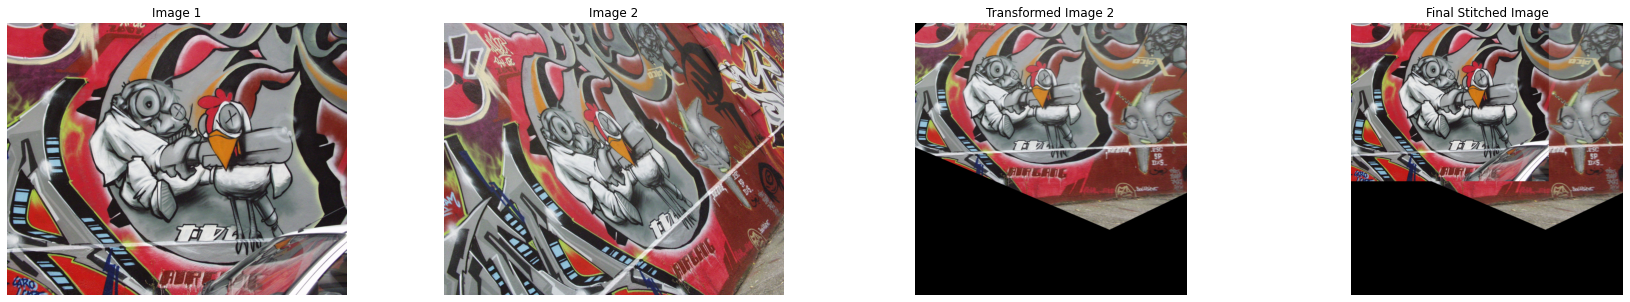

In [18]:
actual_H=np.array([[6.6378505e-01,6.8003334e-01,-3.1230335e+01],
  [-1.4495500e-01,9.7128304e-01,1.4877420e+02],
   [4.2518504e-04,-1.3930359e-05,1.0000000e+00]])
d = len(good) * 0.8
H, count, count_db = RANSAC(pts1,pts2,good, 1, 4, 10000)
error = np.sum(np.square(actual_H - H))
print(error)
print(H)
final_img = cv.warpPerspective(img2, linalg.inv(H),dsize=(1100, 1100))
t_img_5 = np.copy(final_img)
final_img[0:img1.shape[0], 0:img1.shape[1]] = img1

fig, ax = plt.subplots(1, 4, figsize=(30, 5))

ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(t_img_5, cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Transformed Image 2")
ax[3].set_title("Final Stitched Image")